In [1]:
import sys
import numpy as np
from pathlib import Path
import json_tricks
import fnmatch
import os
import io
from opticalglass import util
import matplotlib.pyplot as plt

In [2]:
import opticalglass
from opticalglass import rindexinfo
from opticalglass.rindexinfo import summary_plots

In [3]:
root_pth = Path(opticalglass.__file__).resolve().parent

In [4]:
def save_obj(obj, file_pth):
    with open(file_pth, 'w') as f:
        json_tricks.dump(obj, f, indent=1,
                        separators=(',', ':'), allow_nan=True)

def restore_obj(file_pth, *args, **kwargs):
    with open(file_pth, 'r') as f:
        contents = f.read()
        try:
            obj = json_tricks.loads(contents)
        except Exception as e:
            print(e)
            obj = None
        else:
            if hasattr(obj, 'sync_to_restore'):
                obj.sync_to_restore(*args, **kwargs)
    return obj

# Get a list of all the Yaml files under the database root

In [5]:
db_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database'
path_root = Path(db_root)

In [6]:
os.getcwd()

'/Users/Mike/Developer/PyProjects/opticalglass/notebooks'

In [7]:
os.chdir(db_root)

In [8]:
log = []

# Redirect stderr
class writer(io.TextIOBase):
    def write(self, data):
        log.append(data)
        return len(data)

sys.stderr = writer()

In [9]:
files = []
offset = len(db_root)
for root, dirnames, filenames in os.walk(db_root):
#    print(f"{root[offset:]}")
    for filename in fnmatch.filter(filenames, '*.yml'):
#        print(f"    {filename}")
        files.append(os.path.join(root, filename))

In [10]:
len(files)

2827

In [11]:
def get_glassname_from_filestr(filestr: str):
    full_db_path = filestr[:-4].partition('database/data/')[2]
    name_catalog = full_db_path.split('/')
    catalog = 'rii-'
    if name_catalog[0] == 'glass' or name_catalog[0] == 'other':
        catalog += name_catalog[1]
        name_start = 2
    else:
        catalog += name_catalog[0]
        name_start = 1
    
    name = name_catalog[name_start]
    for subname in name_catalog[name_start+1:]:
        name += '-' + subname

    return name, catalog

In [12]:
url = 'https://refractiveindex.info/database/data/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
fname = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C16H14O3)n - polycarbonate/Zhang.yml'

In [13]:
full_db_path = url[:-4].partition('database/data/')[2]
name_catalog = full_db_path.split('/')
full_db_path, name_catalog

('organic/(C16H14O3)n%20-%20polycarbonate/Zhang',
 ['organic', '(C16H14O3)n%20-%20polycarbonate', 'Zhang'])

In [14]:
fname.partition('database/data/')[2].split('/')

['organic', '(C16H14O3)n - polycarbonate', 'Zhang.yml']

In [15]:
get_glassname_from_filestr(fname)

('(C16H14O3)n - polycarbonate-Zhang', 'rii-organic')

## SiO2

['formula 1']


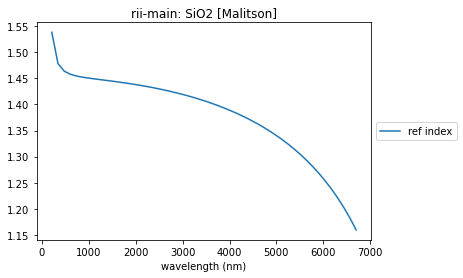

In [16]:
sio2_url = 'https://refractiveindex.info/database/data/main/SiO2/Malitson.yml'
sio2_yaml, name, catalog = rindexinfo.read_rii_url(sio2_url)
sio2 = rindexinfo.create_material(sio2_yaml, name, catalog)
summary_plots(sio2, sio2_yaml)

In [17]:
sio2_url[43:].split('/')

['main', 'SiO2', 'Malitson.yml']

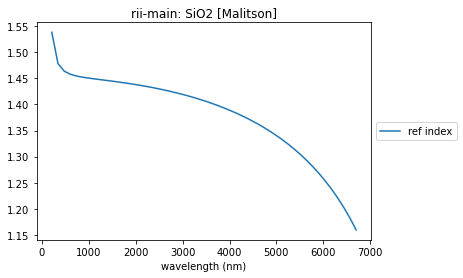

In [18]:
file_pth = root_pth / "test/SiO2.json"
save_obj(sio2, file_pth)
sio2_res = restore_obj(file_pth)
summary_plots(sio2_res)

## Polycarbonate

['tabulated nk']


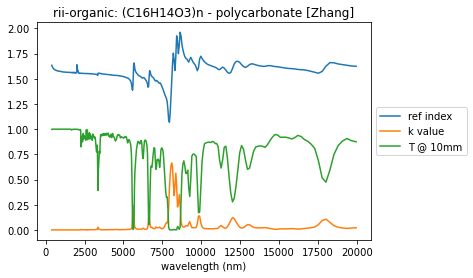

In [19]:
polycarb_url = 'https://refractiveindex.info/database/data/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
polycarb_yaml, name, catalog = rindexinfo.read_rii_url(polycarb_url)
polycarb = rindexinfo.create_material(polycarb_yaml, name, catalog)
summary_plots(polycarb, polycarb_yaml)

In [20]:
polycarb_url[43:].split('/')

['organic', '(C16H14O3)n%20-%20polycarbonate', 'Zhang.yml']

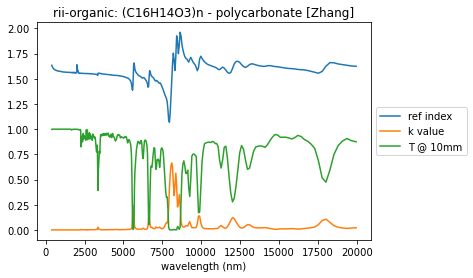

In [21]:
file_pth = root_pth / "test/polycarb.json"
save_obj(polycarb, file_pth)
polycarb_res = restore_obj(file_pth)
summary_plots(polycarb_res)

## Ohara FPL53

['formula 3', 'tabulated k']


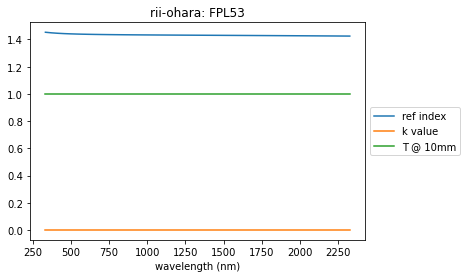

In [22]:
FPL53_url = 'https://refractiveindex.info/database/data/glass/ohara/FPL53.yml'
FPL53_yaml, name, catalog = rindexinfo.read_rii_url(FPL53_url)
FPL53 = rindexinfo.create_material(FPL53_yaml, name, catalog)
summary_plots(FPL53, FPL53_yaml)

In [23]:
get_glassname_from_filestr(FPL53_url)

('FPL53', 'rii-ohara')

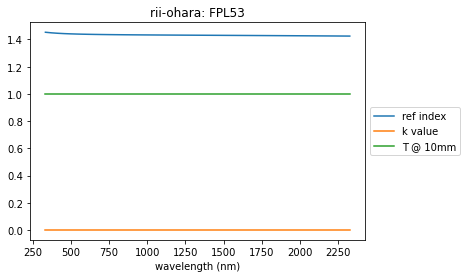

In [24]:
file_pth = root_pth / "test/FPL53.json"
save_obj(FPL53, file_pth)
summary_plots(restore_obj(file_pth))

## CaF2

['formula 2']


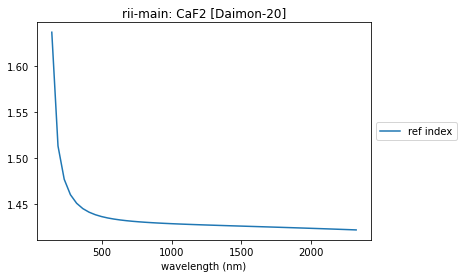

In [25]:
caf2_url = 'https://refractiveindex.info/database/data/main/CaF2/Daimon-20.yml'
caf2_yaml, name, catalog = rindexinfo.read_rii_url(caf2_url)
caf2 = rindexinfo.create_material(caf2_yaml, name, catalog)
summary_plots(caf2, caf2_yaml)

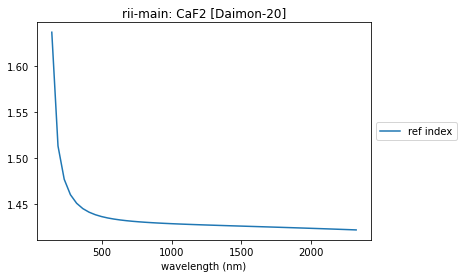

In [26]:
file_pth = root_pth / "test/caf2.json"
save_obj(caf2, file_pth)
summary_plots(restore_obj(file_pth))

## Germanium

['tabulated nk']


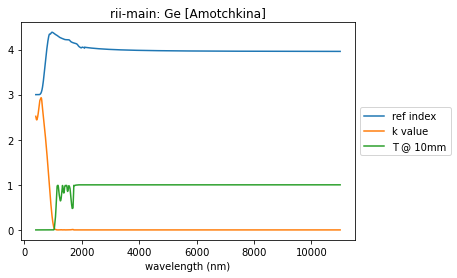

In [27]:
ge_url = 'https://refractiveindex.info/database/data/main/Ge/Amotchkina.yml'
ge_yaml, name, catalog = rindexinfo.read_rii_url(ge_url)
ge = rindexinfo.create_material(ge_yaml, name, catalog)
summary_plots(ge, ge_yaml)

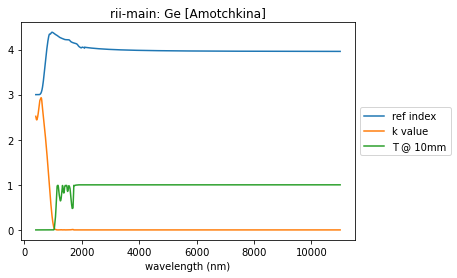

In [28]:
file_pth = root_pth / "test/ge.json"
save_obj(ge, file_pth)
summary_plots(restore_obj(file_pth))

# PEDOT

In [29]:
pedot_filename = files[239]
pedot_filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/mixed organic/PEDOT-PSS/Chen.yml'

['tabulated n', 'tabulated k']


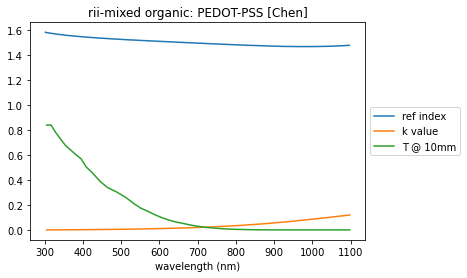

In [30]:
pedot_yaml, name, catalog = rindexinfo.read_rii_file(Path(pedot_filename))
pedot = rindexinfo.create_material(pedot_yaml, name, catalog)
summary_plots(pedot, pedot_yaml)

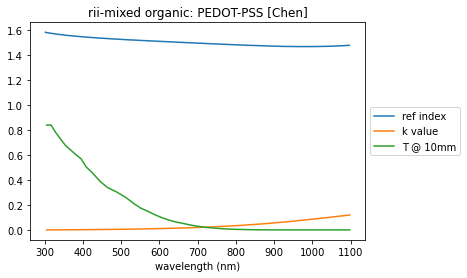

In [31]:
file_pth = root_pth / "test/pedot.json"
save_obj(pedot, file_pth)
summary_plots(restore_obj(file_pth))

# CCl4 - carbon tetrachloride

In [32]:
filename = files[108]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/CCl4 - carbon tetrachloride/Moutzouris.yml'

['formula 3']


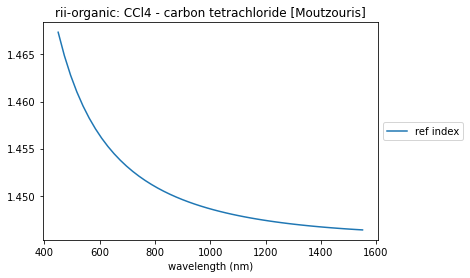

In [33]:
CCl4_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
CCl4 = rindexinfo.create_material(CCl4_yaml, name, catalog)
summary_plots(CCl4, CCl4_yaml)

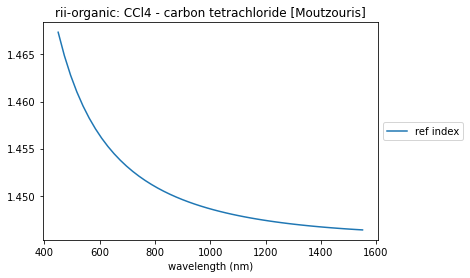

In [34]:
file_pth = root_pth / "test/CCl4.json"
save_obj(CCl4, file_pth)
summary_plots(restore_obj(file_pth))

# F1 LZOS

In [35]:
filename = files[375]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/F1.yml'

['tabulated n']


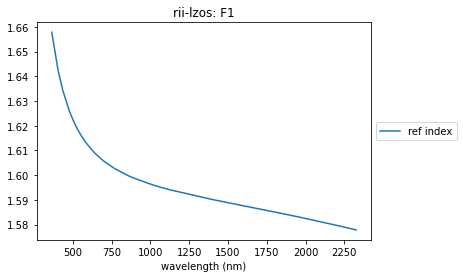

In [36]:
F1_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
F1 = rindexinfo.create_material(F1_yaml, name, catalog)
summary_plots(F1, F1_yaml)

In [37]:
vars(F1)

{'label': 'F1',
 '_catalog': 'rii-lzos',
 'wvls': array([ 365.  ,  404.66,  435.83,  479.99,  486.13,  488.  ,  514.  ,
         520.8 ,  530.  ,  546.07,  568.2 ,  587.56,  589.29,  632.8 ,
         643.85,  647.1 ,  656.27,  694.3 ,  706.52,  768.2 ,  852.1 ,
         890.  , 1013.9 , 1060.  , 1128.6 , 1395.1 , 1529.6 , 1813.1 ,
        1970.1 , 2249.3 , 2325.4 ]),
 'rndx': array([1.65782 , 1.64269 , 1.634312, 1.625647, 1.624657, 1.62436 ,
        1.62066 , 1.61979 , 1.61868 , 1.616878, 1.61467 , 1.612945,
        1.6128  , 1.60955 , 1.608833, 1.60863 , 1.608067, 1.60597 ,
        1.60537 , 1.60273 , 1.59994 , 1.59889 , 1.59609 , 1.59522 ,
        1.59404 , 1.59021 , 1.5885  , 1.58493 , 1.58289 , 1.57899 ,
        1.57785 ]),
 'kvals': None,
 'kvals_wvls': None,
 'rindex_interp': <scipy.interpolate._interpolate.interp1d at 0x7f89793aff90>,
 'kvals_interp': None,
 'yaml_data': {'REFERENCES': '<a href="http://lzos.ru/en/index.php?option=com_content&task=view&id=54">LZOS Clear optical g

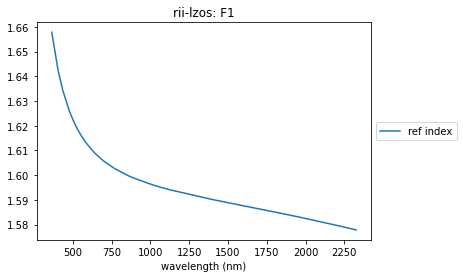

In [38]:
file_pth = root_pth / "test/F1.json"
save_obj(F1, file_pth)
summary_plots(restore_obj(file_pth))

# MgF2

In [39]:
filename = files[2234]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/MgF2/Li-e.yml'

['formula 1']


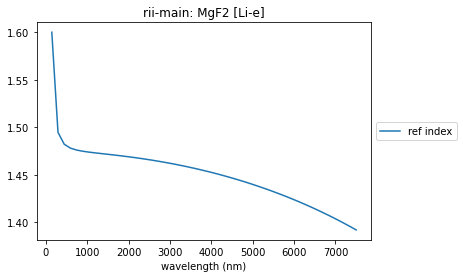

In [40]:
MgF2_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
MgF2 = rindexinfo.create_material(MgF2_yaml, name, catalog)
summary_plots(MgF2, MgF2_yaml)

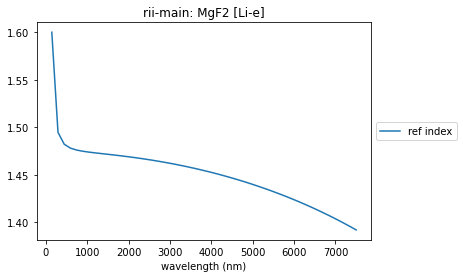

In [41]:
file_pth = root_pth / "test/MgF2.json"
save_obj(MgF2, file_pth)
summary_plots(restore_obj(file_pth))

# KNbO3

In [42]:
filename = files[2173]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/KNbO3/Umemura-alpha.yml'

['formula 4']


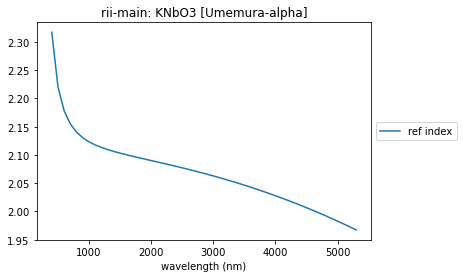

In [43]:
KNbO3_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
KNbO3 = rindexinfo.create_material(KNbO3_yaml, name, catalog)
summary_plots(KNbO3, KNbO3_yaml)

In [44]:
KNbO3.data_range

array([0.4, 5.3])

In [45]:
KNbO3_yaml

{'REFERENCES': 'N. Umemura, K. Yoshida, and K. Kato. Phase-matching properties of KNbO<sub>3</sub> in the mid-infrared, <a href="    https://doi.org/10.1364/AO.38.000991"><i>Appl Opt.</i> <b>38</b>, 991-994 (1999)</a>',
 'COMMENTS': 'n<sub>α</sub>; 22 °C.',
 'DATA': [{'type': 'formula 4',
   'wavelength_range': '0.40 5.3',
   'coefficients': '4.4222 0.09972 0 0.05496 1 0 0 0 1 -0.01976 2'}]}

In [46]:
KNbO3.coefs

array([ 4.4222 ,  0.09972,  0.     ,  0.05496,  1.     ,  0.     ,
        0.     ,  0.     ,  1.     , -0.01976,  2.     ])

In [47]:
len(KNbO3.coefs)

11

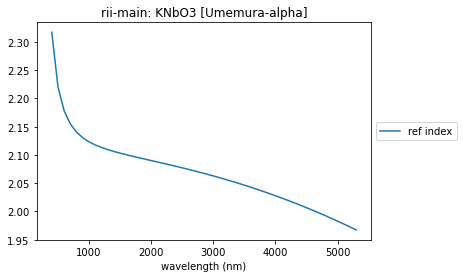

In [48]:
file_pth = root_pth / "test/KNbO3.json"
save_obj(KNbO3, file_pth)
summary_plots(restore_obj(file_pth))

# Liquid crystal MLC-6608

In [49]:
filename = files[260]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/liquid crystals/MLC-6608/Li-o.yml'

['formula 5']


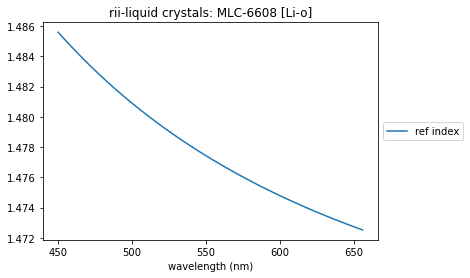

In [50]:
LC_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
LC = rindexinfo.create_material(LC_yaml, name, catalog)
summary_plots(LC, LC_yaml)

In [51]:
LC.data_range

array([0.45 , 0.656])

In [52]:
2373

2373

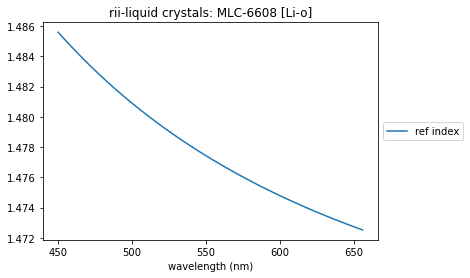

In [53]:
file_pth = root_pth / "test/LC.json"
save_obj(LC, file_pth)
summary_plots(restore_obj(file_pth))

# CdS

In [54]:
filename = files[2373]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/CdS/Bieniewski-o.yml'

['formula 4']


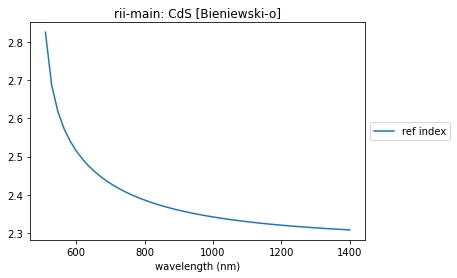

In [55]:
CdS_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
CdS = rindexinfo.create_material(CdS_yaml, name, catalog)
summary_plots(CdS, CdS_yaml)

In [56]:
CdS.data_range

array([0.51, 1.4 ])

In [57]:
CdS.coefs

array([5.1792  , 0.23504 , 0.      , 0.083591, 1.      , 0.036927,
       0.      , 0.23504 , 1.      ])

In [58]:
CdS_yaml['REFERENCES']

'1) T. M. Bieniewski and S. J. Czyzak. Refractive indexes of single hexagonal ZnS and CdS crystals, <a href="https://doi.org/10.1364/JOSA.53.000496"><i>J. Opt. Soc. Am.</i> <b>53</b>, 496-497 (1963)</a><br>2) M. Sanchez Gomez, J. M. Guerra, and F. Vilches. Weighted nonlinear regression analysis of a Sellmeier expansion: comparison of several nonlinear fits of CdS dispersion, <a href="https://doi.org/10.1364/AO.24.001147"><i>Appl. Opt.</i> <b>24</b>, 1147-1150 (1985)</a></br>* Ref. 2 provides a dispersion formula based on data from ref. 1'

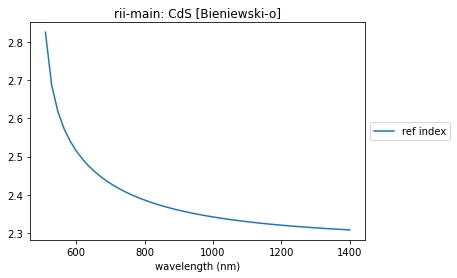

In [59]:
file_pth = root_pth / "test/CdS.json"
save_obj(CdS, file_pth)
summary_plots(restore_obj(file_pth))

# PtAl2

In [60]:
filename = files[179]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/intermetallics/PtAl2/Chen.yml'

['tabulated nk']


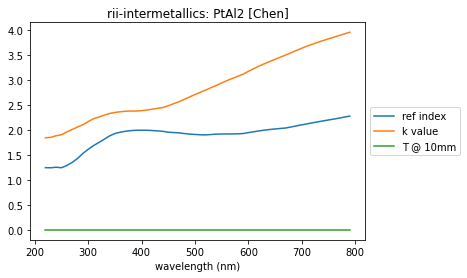

In [61]:
PtAl2_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
PtAl2 = rindexinfo.create_material(PtAl2_yaml, name, catalog)
summary_plots(PtAl2, PtAl2_yaml)

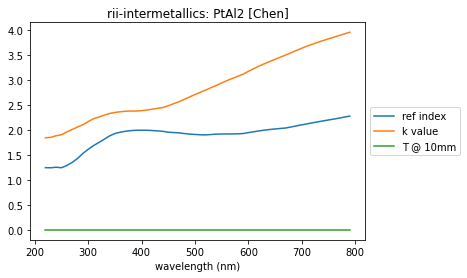

In [62]:
file_pth = root_pth / "test/PtAl2.json"
save_obj(PtAl2, file_pth)
summary_plots(restore_obj(file_pth))

# C2ClF3

In [63]:
filename = files[43]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C2ClF3)n - polychlorotrifluoroethylene/Smith.yml'

['tabulated nk']


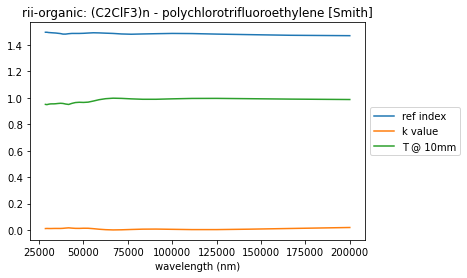

In [64]:
C2ClF3_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    C2ClF3 = rindexinfo.create_material(C2ClF3_yaml, name, catalog)
except Exception as err:
    print(err)
else:
    summary_plots(C2ClF3, C2ClF3_yaml)

In [65]:
C2ClF3_yaml

{'REFERENCES': 'D. R. Smith and E. V. Loewenstein. Optical constants of far infrared materials. 3: plastics, <a href="https://doi.org/10.1364/AO.14.001335"><i>Appl. Opt.</i> <b>14</b>, 1335-1341 (1975)</a>',
 'COMMENTS': 'Manufactured by Allied Chemical under the name Aclar.',
 'DATA': [{'type': 'tabulated nk',
   'data': '28.5714 1.497 0.0114\n29.4118 1.497 0.0122\n30.3030 1.495 0.0118\n31.2500 1.494 0.0116\n32.2581 1.493 0.0118\n33.3333 1.492 0.0122\n34.4828 1.491 0.0123\n35.7143 1.489 0.0122\n37.0370 1.487 0.0122\n38.4615 1.483 0.0131\n40.0000 1.483 0.0151\n41.6667 1.486 0.0168\n43.4783 1.488 0.0146\n45.4545 1.488 0.0129\n47.6190 1.488 0.0127\n50.0000 1.489 0.0138\n52.6316 1.491 0.0136\n55.5556 1.493 0.0106\n58.8235 1.492 0.00632\n62.5000 1.490 0.0029\n66.6667 1.488 0.0011\n71.4286 1.484 0.0020\n76.9231 1.482 0.0044\n83.3333 1.484 0.00683\n90.9091 1.486 0.00745\n100.0000 1.488 0.0056\n111.1111 1.487 0.0035\n125.0000 1.483 0.0035\n142.8571 1.479 0.0066\n166.6667 1.474 0.012\n200.0000

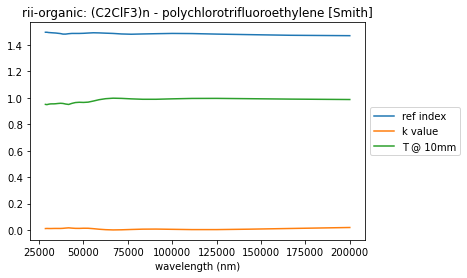

In [66]:
file_pth = root_pth / "test/C2ClF3.json"
save_obj(C2ClF3, file_pth)
summary_plots(restore_obj(file_pth))